In [1]:
from scipy.fft import fft, fftfreq
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [3]:
MMS2_B = pd.read_csv('MMS2_B.csv',header = 0,names = ['times','Bx','By','Bz','Bmag','date'],
                         parse_dates=['date'])
MMS2_V = pd.read_csv('MMS2_V.csv',
                     header = 0,names = ['times','Vx','Vy','Vz','date'],
                     parse_dates=['date'])

MMS2_n = pd.read_csv('MMS2_n.csv',
                     header = 0,names = ['times','n','date'],
                     parse_dates=['date'])

MMS2_Tperp = pd.read_csv('MMS2_Tperp.csv',
                     header = 0,names = ['times','Tperp','date'],
                     parse_dates=['date'])

MMS2_Tpara = pd.read_csv('MMS2_Tpara.csv',
                     header = 0,names = ['times','Tpara','date'],
                     parse_dates=['date'])

In [3]:
MMS2_B

,times,Bx,By,Bz,Bmag,date
0,1.592426e+09,6.831184,2.097465,8.011147,10.735126,2020-06-17 20:29:23.249434112
1,1.592426e+09,6.841014,2.092012,8.037822,10.760231,2020-06-17 20:29:23.257246976
2,1.592426e+09,6.823400,2.076468,8.044454,10.750989,2020-06-17 20:29:23.265059072
3,1.592426e+09,6.798868,2.074919,8.046974,10.737024,2020-06-17 20:29:23.272871936
4,1.592426e+09,6.819839,2.061433,8.057381,10.755514,2020-06-17 20:29:23.280684032
...,...,...,...,...,...,...
2308347,1.592444e+09,2.217578,2.958381,8.717915,9.469515,2020-06-18 01:30:02.413986048
2308348,1.592444e+09,2.205297,2.972957,8.730649,9.482935,2020-06-18 01:30:02.421797888
2308349,1.592444e+09,2.226805,2.989825,8.726459,9.489406,2020-06-18 01:30:02.429611008
2308350,1.592444e+09,2.229691,2.994750,8.727658,9.492738,2020-06-18 01:30:02.437423104


In [4]:
# (B-field is a lot of data and makes everything slow)

st_time = pd.to_datetime("2020-06-17/20:30:00")
end_time = pd.to_datetime("2020-06-18/01:30:00")



# MMS2_B2 = pd.read_csv('MMS2_B.csv',header = 0,names = ['times','Bx','By','Bz','date'],
#                          parse_dates=['date'])


st_idx_B = MMS2_B.date.searchsorted(st_time)
end_idx_B = MMS2_B.date.searchsorted(end_time)


print(st_idx_B)

print(end_idx_B)

# dby = data_b[:,1]
# dbz = data_b[:,2]

MMS2_B_trimmed = pd.DataFrame({"date": MMS2_B['date'][st_idx_B:end_idx_B], "Bx": MMS2_B['Bx'][st_idx_B:end_idx_B],
                           "By": MMS2_B['By'][st_idx_B:end_idx_B], "Bz": MMS2_B['Bz'][st_idx_B:end_idx_B]})

#MMS2_B_trimmed
#Audio(sound_file, autoplay=True)


4705
2308039


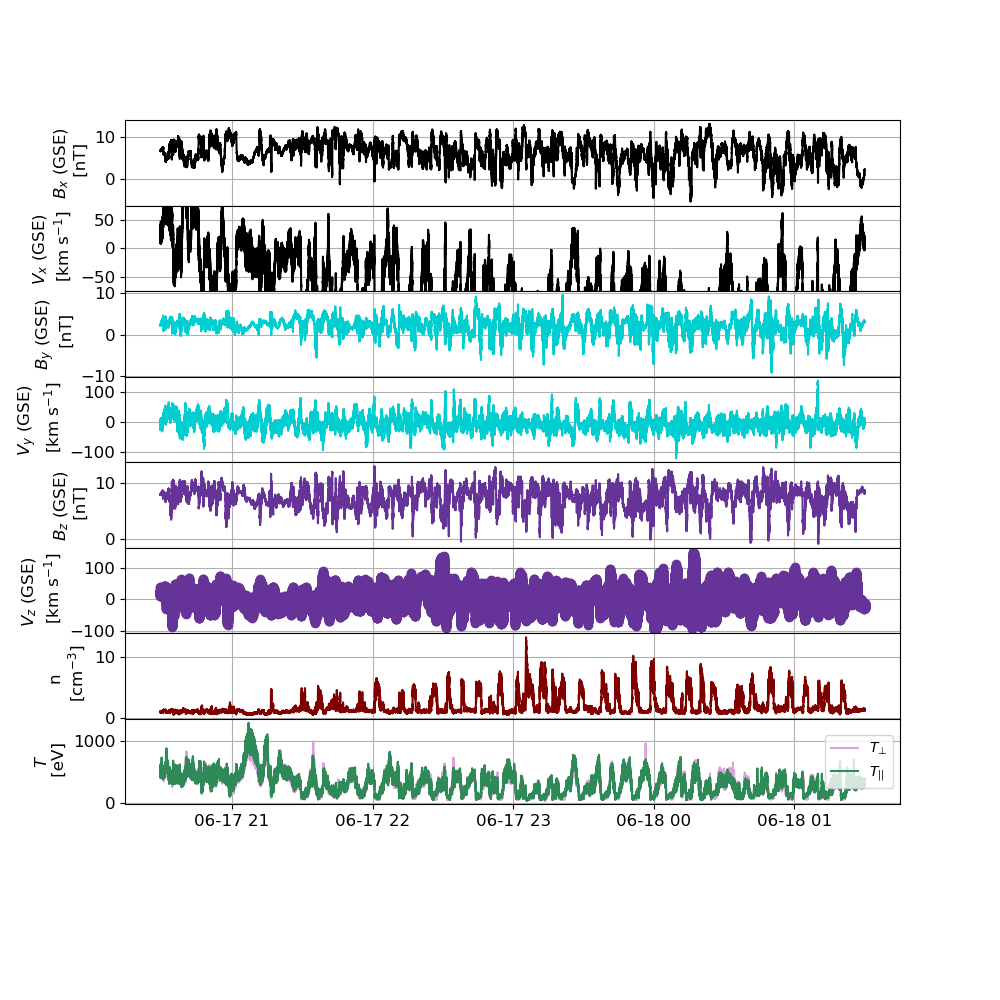

In [21]:
# Matplotlib plotting
%matplotlib widget


fig = plt.figure(figsize=(10,10))
plt.rcParams.update({'font.size': 12})



# Bx GSE
ax_Bx = fig.add_subplot(911)
#ax_Bx.set_title('Raw Data')
#ax_Bx.plot(MMS2_B_trimmed['date'],MMS2_B_trimmed['Bx'], label='$B_x$', color ='black')
ax_Bx.plot(MMS2_B['date'],MMS2_B['Bx'], label='$B_x$', color ='black')
ax_Bx.set_ylabel('$B_x$ (GSE) \n [nT]')
ax_Bx.grid('on')
#ax_Bx.set_xticklabels([])
#ax_Bx.set_ylim([-50,50])

#Vx GSE
ax_Vx = fig.add_subplot(912,sharex = ax_Bx)
#ax_Vx.set_title('Raw Data')
ax_Vx.plot(MMS2_V['date'],MMS2_V['Vx'], label='$V_x$', color ='black')
ax_Vx.set_ylabel('$V_x$ (GSE) \n [km s$^{-1}$]')
ax_Vx.grid('on')
ax_Vx.set_ylim([-75,75])



# By GSE
ax_By = fig.add_subplot(913,sharex = ax_Bx)
#ax_By.plot(MMS2_B_trimmed['date'],MMS2_B_trimmed['By'], label='$B_y$', color ='darkturquoise')
ax_By.plot(MMS2_B['date'],MMS2_B['By'], label='$B_y$', color ='darkturquoise')
ax_By.set_ylabel('$B_y$ (GSE) \n [nT]')
ax_By.grid('on')
#ax_By.set_ylim([-50,50])

#Vy GSE
ax_Vy = fig.add_subplot(914,sharex = ax_Bx)
ax_Vy.plot(MMS2_V['date'],MMS2_V['Vy'], label='$V_y$', color ='darkturquoise')
ax_Vy.set_ylabel('$V_y$ (GSE) \n [km s$^{-1}$]')
ax_Vy.grid('on')
#ax_Vy.set_ylim([-50,50]



#Bz GSE
ax_Bz = fig.add_subplot(915,sharex = ax_Bx)
#ax_Bz.plot(MMS2_B_trimmed['date'],MMS2_B_trimmed['Bz'], label='$B_z$', color ='rebeccapurple')
ax_Bz.plot(MMS2_B['date'],MMS2_B['Bz'], label='$B_z$', color ='rebeccapurple')
ax_Bz.set_ylabel('$B_z$ (GSE) \n [nT]')
ax_Bz.grid('on')
#ax_Bz.set_ylim([-50,50])




#Vz GSE
ax_Vz = fig.add_subplot(916,sharex = ax_Bx)
ax_Vz.plot(MMS2_V['date'],MMS2_V['Vz'], label='$V_z$',marker='o', color ='rebeccapurple')
ax_Vz.set_ylabel('$V_z$ (GSE) \n [km s$^{-1}$]')
ax_Vz.grid('on')

# ion density
ax_n = fig.add_subplot(917,sharex = ax_Bx)
ax_n.plot(MMS2_n['date'],MMS2_n['n'], label='$n$',color = 'maroon')
ax_n.set_ylabel('n \n [cm$^{-3}$]')
ax_n.grid('on')
#ax_n.set_xticklabels([])



# ion parallel and perpendicular temperature
ax_T = fig.add_subplot(918,sharex = ax_Bx)
ax_T.plot(MMS2_Tperp['date'],MMS2_Tperp['Tperp'], label='$T_{⊥}$',color ='plum')
ax_T.plot(MMS2_Tpara['date'],MMS2_Tpara['Tpara'], label='$T_{||}$',color ='seagreen')
ax_T.set_ylabel('$T$ \n [eV]')
ax_T.grid('on')
ax_T.legend(loc='center right',fontsize='small')



# ax_IMF = fig.add_subplot(918,sharex = ax_Bx)
# ax_IMF.plot(OMNI_IMF['date'],OMNI_IMF['IMF'], label='IMF',color ='darkgray')
# #ax_IMF.plot(OMNI_flow_['date'],OMNI_IMF['IMF'], label='$T_{||}$',color ='seagreen')
# ax_IMF.set_ylabel('IMF ')
# ax_IMF.grid('on')
# #x_IMF.legend(loc='center right',fontsize='small')




# #ax1.set_xticks([])
# plt.grid('on')
# plt.legend()
# ax2 = fig.add_subplot(512)
# ax2.plot(MMS2_n['date'],MMS2_n['n'], label='$n$')
# ax2.set_ylabel('n \n [cm$^{-3}$]')
# ax2.grid('on')
# #ax2.set_xticks([])
# #plt.grid('on')
# ax3 = fig.add_subplot(513)
# ax3.plot(MMS2_Tpara['date'],MMS2_Tpara['Tpara'], label='$T_{||}$')
# ax3.set_ylabel('$T_{||}$ \n [eV]')
# ax3.grid('on')
# #ax3.set_xticks([])
# #plt.grid('on')
# ax4 = fig.add_subplot(514)
# ax4.plot(MMS2_Tperp['date'],MMS2_Tperp['Tperp'], label='$T_{⊥}$')
# ax4.set_ylabel('$T_{⊥}$ \n [eV]')
# ax4.grid('on')
# #ax4.set_xticks([])
# #plt.grid('on')
# ax5 = fig.add_subplot(515)
# ax5.plot(MMS2_V['date'],MMS2_V['Vx'], label='$V_x$')
# ax5.plot(MMS2_V['date'],MMS2_V['Vy'], label='$V_y$')
# ax5.plot(MMS2_V['date'],MMS2_V['Vz'], label='$V_z$')
# ax5.set_ylabel('$V}$ \n [km s$^{-1}$]')
# ax5.grid('on')

plt.subplots_adjust(hspace=0.0)

#plt.legend()
#plt.grid('on')

plt.show()
# plt.close()
#fig.savefig('Full_time_period_data')

In [9]:
MMS2_n

,times,n,date
0,1.592426e+09,0.997805,2020-06-17 20:29:23.206896128
1,1.592426e+09,0.972963,2020-06-17 20:29:23.356896000
2,1.592426e+09,1.035904,2020-06-17 20:29:23.506895872
3,1.592426e+09,0.982830,2020-06-17 20:29:23.656896000
4,1.592426e+09,1.015891,2020-06-17 20:29:23.806896128
...,...,...,...
120254,1.592444e+09,1.330059,2020-06-18 01:30:02.312813056
120255,1.592444e+09,1.370617,2020-06-18 01:30:02.462812928
120256,1.592444e+09,1.340278,2020-06-18 01:30:02.612813056
120257,1.592444e+09,1.286046,2020-06-18 01:30:02.762812928


In [28]:
MMS2_n['times'][1]- MMS2_n['times'][0]


print(MMS2_n['times'])
time_in_sec = pd.to_numeric(np.array(MMS2_n['times']))/1e9

print(time_in_sec)

0         1.592426e+09
1         1.592426e+09
2         1.592426e+09
3         1.592426e+09
4         1.592426e+09
              ...     
120254    1.592444e+09
120255    1.592444e+09
120256    1.592444e+09
120257    1.592444e+09
120258    1.592444e+09
Name: times, Length: 120259, dtype: float64
[1.59242576 1.59242576 1.59242576 ... 1.5924438  1.5924438  1.5924438 ]


number of sample points 120259
1.0
length of frequency array: 120258
length of FFT of density: 120259
Max power 4.050712899856641


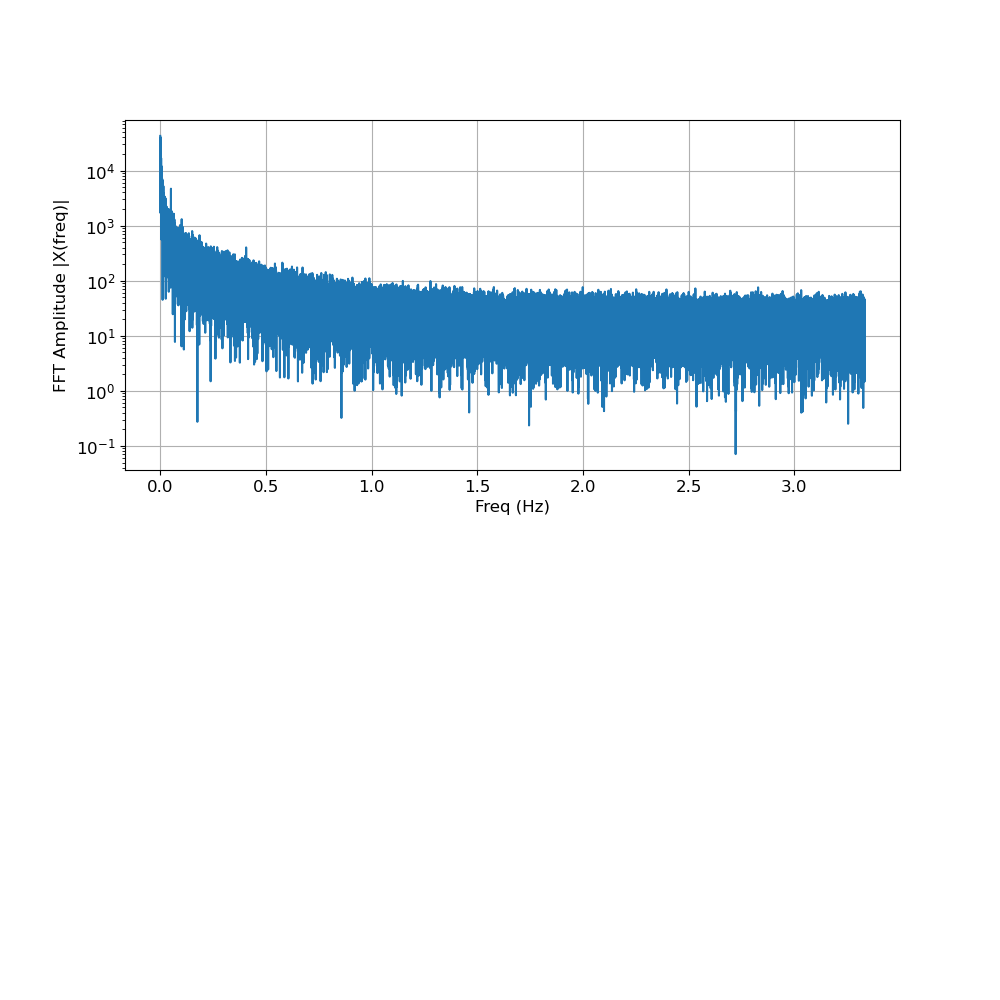

In [25]:
n_arr = np.array(pd.to_numeric(MMS2_n['n']))





# Number of sample points
N = len(MMS2_n['n'])

print('number of sample points',N)

#print((MMS2_n['date'].iloc[1::2]) - (MMS2_n['date'].iloc[::2]))


# calculate the time difference between consecutive rows
time_diff = pd.to_numeric(MMS2_n['times'].diff())
#print('time difference',time_diff)


# Frequency spacing 
# The minimum time difference is found with
# print(np.diff(MMS2_n['date'].index.values).min())
# which is normally in units of ns. To get a frequency, assuming ns:
# freq = 1e9 / np.diff(df.index.values).min().astype(int)


# DIS provides data in ns. 
freq = 1 / np.diff(MMS2_n['times'].index.values).astype(int)

print(np.nanmean(freq))

x = np.array(pd.to_numeric(MMS2_n['n']))


# The FFT is an algorithm that implements the Fourier transform and can calculate 
# a frequency spectrum for a signal in the time domain
yf = fft(np.array(pd.to_numeric(MMS2_n['n'])))

# Return the Discrete Fourier Transform sample frequencies.
xf = fftfreq(N, time_diff)

print('length of frequency array:', len(freq))

print('length of FFT of density:', len(yf))

print('Max power',max(2.0/N * np.abs(yf[0:N//2])))

fig = plt.figure(figsize=(10,10))
plt.subplot(211)
plt.semilogy(xf[0:N//2], np.abs(yf[0:N//2]))
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.grid()


# plt.subplot(212)
# plt.semilogy(freq, np.abs(yf[1:N]))
# plt.xlabel('Freq (Hz)')
# plt.ylabel('FFT Amplitude |X(freq)|')
# plt.grid()

plt.show()




In [ ]:
# find phase speed 